In [1]:
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)

Mounted at /content/drive/


In [2]:
from os import listdir
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [3]:
! unzip '/content/drive/My Drive/Colab Notebooks/Programming Language Detection/Experiment-3/Dataset.zip'

Streaming output truncated to the last 5000 lines.
  inflating: Dataset/Train/Rust/aks-test-for-primes-2.rust  
  inflating: Dataset/Train/Rust/align-columns.rust  
  inflating: Dataset/Train/Rust/aliquot-sequence-classifications.rust  
  inflating: Dataset/Train/Rust/almost-prime.rust  
  inflating: Dataset/Train/Rust/amb.rust  
  inflating: Dataset/Train/Rust/amicable-pairs.rust  
  inflating: Dataset/Train/Rust/anagrams-1.rust  
  inflating: Dataset/Train/Rust/anagrams-2.rust  
  inflating: Dataset/Train/Rust/anagrams-deranged-anagrams.rust  
  inflating: Dataset/Train/Rust/animation.rust  
  inflating: Dataset/Train/Rust/anonymous-recursion.rust  
  inflating: Dataset/Train/Rust/append-a-record-to-the-end-of-a-text-file.rust  
  inflating: Dataset/Train/Rust/apply-a-callback-to-an-array.rust  
  inflating: Dataset/Train/Rust/arbitrary-precision-integers--included-.rust  
  inflating: Dataset/Train/Rust/arena-storage-pool.rust  
  inflating: Dataset/Train/Rust/arithmetic-complex.rus

In [5]:
dataset = {}
for folder in listdir('Dataset/Train'):
    for idx, file in enumerate(listdir('Dataset/Train/' + folder)):
        print("{} | {} -> {}".format(idx, folder, file))
        f = open('Dataset/Train/' + folder + "/" + file, "r")
        dataset[folder + "_" + str(idx)] = f.read()
        f.close()

Streaming output truncated to the last 5000 lines.
153 | REXX -> date-manipulation.rexx
154 | REXX -> logical-operations-1.rexx
155 | REXX -> last-friday-of-each-month.rexx
156 | REXX -> sorting-algorithms-strand-sort.rexx
157 | REXX -> program-termination-2.rexx
158 | REXX -> parsing-shunting-yard-algorithm-2.rexx
159 | REXX -> conditional-structures-1.rexx
160 | REXX -> execute-hq9+.rexx
161 | REXX -> perfect-numbers-2.rexx
162 | REXX -> flow-control-structures-4.rexx
163 | REXX -> executable-library-1.rexx
164 | REXX -> permutations-2.rexx
165 | REXX -> a+b-5.rexx
166 | REXX -> terminal-control-preserve-screen.rexx
167 | REXX -> real-constants-and-functions-3.rexx
168 | REXX -> loops-downward-for-2.rexx
169 | REXX -> runge-kutta-method.rexx
170 | REXX -> sort-using-a-custom-comparator.rexx
171 | REXX -> knights-tour.rexx
172 | REXX -> matrix-transposition.rexx
173 | REXX -> string-append-2.rexx
174 | REXX -> digital-root-2.rexx
175 | REXX -> circles-of-given-radius-through-two-point

In [6]:
# Prepare the dataframe
df = pd.DataFrame(list(dataset.items()), columns=['prog_lang', 'code_snippet'])

# Create new ID column
df['ID'] = df['prog_lang'].apply(lambda x: x.split('_')[1])
df['prog_lang'] = df['prog_lang'].apply(lambda x: x.split('_')[0])

# get rid of '\n' from whitespace 
df['code_snippet'] = df['code_snippet'].apply(lambda x: x.replace('\n', ' '))
print(df.shape)
df.head()

(30969, 3)


,prog_lang,code_snippet,ID
0,Tcl,SudokuSolver create sudoku sudoku load { {...,0
1,Tcl,"lassign [addsub 33 12] sum difference puts ""33...",1
2,Tcl,set result [ldap::search $conn $Base $Filter $...,2
3,Tcl,proc pascal_iterative n { if {$n < 1} {err...,3
4,Tcl,package require Tcl 8.5 set hofcon10k {1 1} p...,4


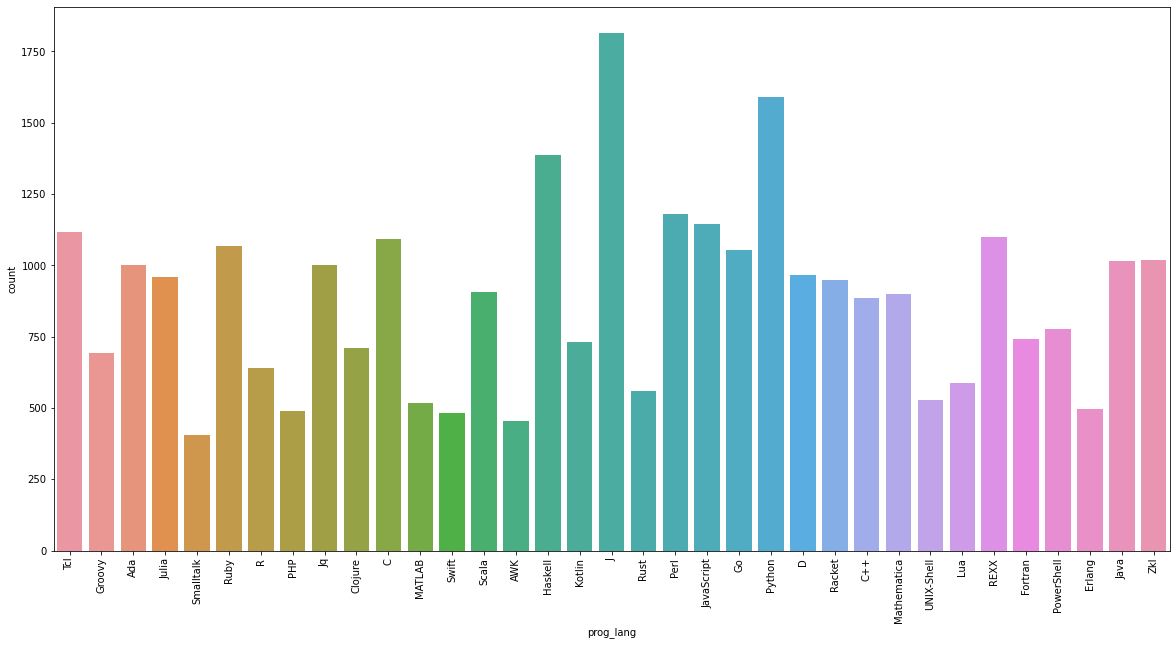

In [8]:
plt.figure(figsize=(20, 10))
plt.xticks(rotation=90)
sns.countplot(x="prog_lang", data=df)

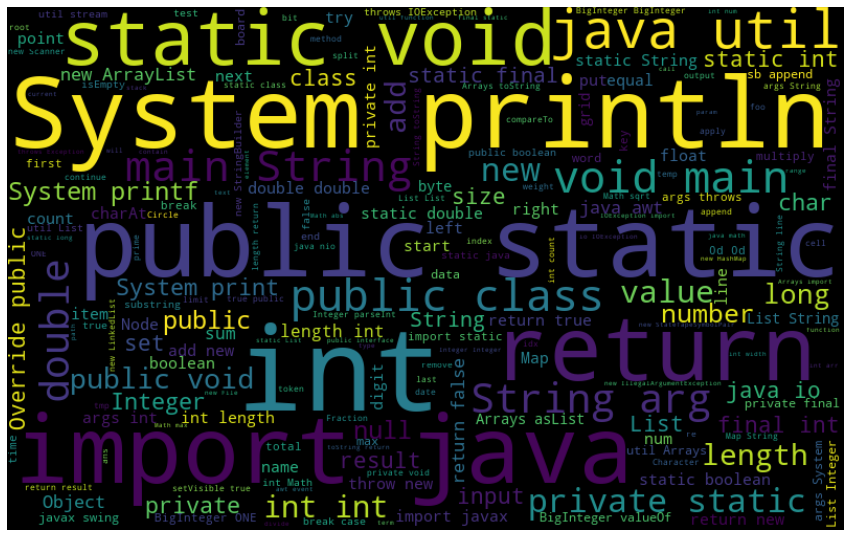

In [9]:
all_words = ' '.join([text for text in df[df['prog_lang']=='Java']['code_snippet']])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

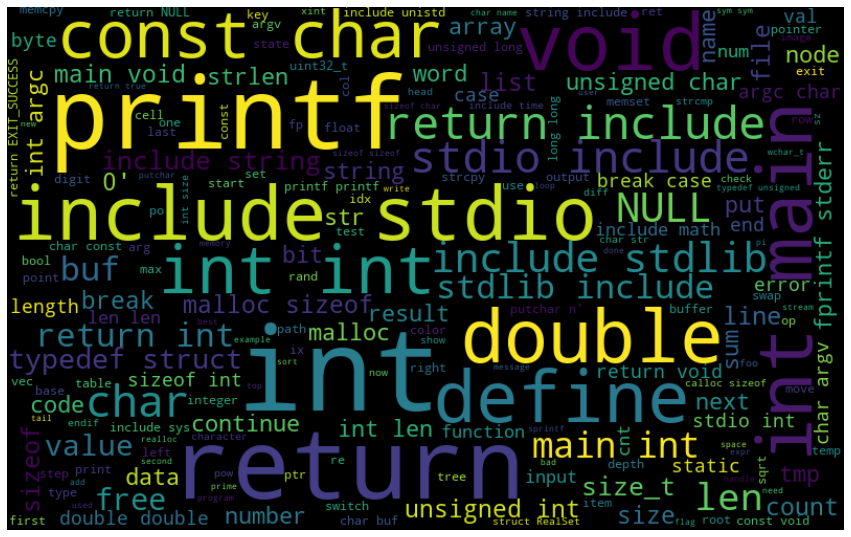

In [10]:
all_words = ' '.join([text for text in df[df['prog_lang']=='C']['code_snippet']])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

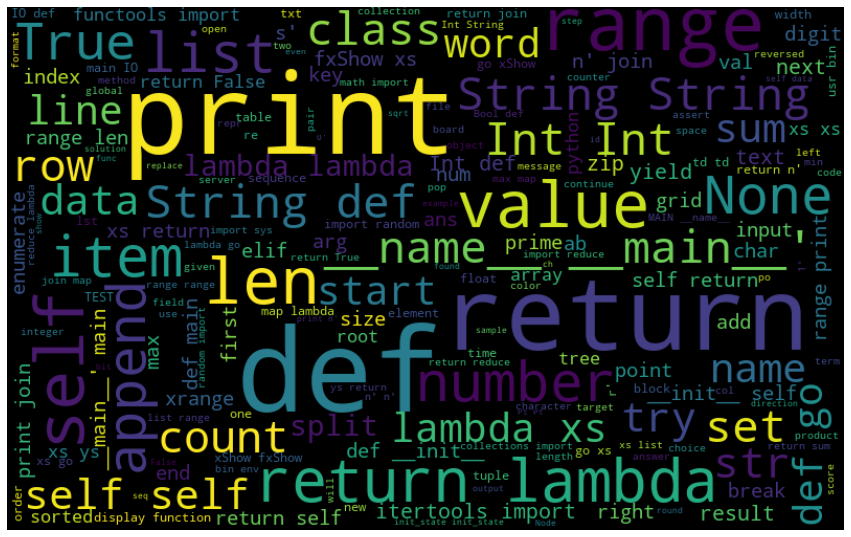

In [11]:
all_words = ' '.join([text for text in df[df['prog_lang']=='Python']['code_snippet']])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()